<a href="https://colab.research.google.com/github/jaeguk-ju/ju/blob/master/DNN_vs_CNN(%EC%A3%BC%EC%9E%AC%EA%B5%AD).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2차 과제(1번) 성명 : 주재국, 학번 : 201985-*010172*

  CIFAR10 자료를 이용한 모델에서 비슷한 Parameter에서
 DNN(test_accuracy 0.424) <  CNN(test_accuracy 0.714)  



In [18]:
import tensorflow as tf
from tensorflow.keras import datasets, models
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPool2D
from tensorflow.keras.utils import plot_model
from keras.datasets import cifar10
print(tf.__version__)

2.3.0


In [19]:
(train_x, train_y), (test_x, test_y) = cifar10.load_data()
## train_x : need for learning DNN
## ext_train_x : need for learning CNN
train_x = train_x/255.0
test_x = test_x/255.0

ext_train_x = train_x.reshape((50000, 32, 32, 3))
ext_test_x = test_x.reshape((10000, 32, 32, 3))

## show the dimensions 
print(ext_test_x.shape)
print(ext_train_x.shape)


(10000, 32, 32, 3)
(50000, 32, 32, 3)


In [20]:
## Define a DNN model and a CNN model
## set the number of params. of DNN and the number of params. of CNN to be similar

## DNN model
dnn_model = models.Sequential([
  Flatten(input_shape=(32,32,3)),
  Dense(50, activation='relu'),
  Dense(50, activation='relu'),
  Dense(10, activation='softmax')]
)

## CNN model
cnn_model = models.Sequential([
  Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
  MaxPool2D(pool_size=(2, 2), strides=(2,2), padding='valid'),
  Conv2D(64, (3, 3), activation='relu'),
  MaxPool2D(pool_size=(2, 2), strides=(2,2), padding='valid'),
  Conv2D(64, (3, 3), activation='relu'),
  Flatten(),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax')
])

dnn_model.summary()
cnn_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 50)                153650    
_________________________________________________________________
dense_21 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_22 (Dense)             (None, 10)                510       
Total params: 156,710
Trainable params: 156,710
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 32)        896       
__________________________

In [21]:
dnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

dnn_hist=dnn_model.fit(train_x, train_y, epochs=20, batch_size=100, validation_split=0.10)
cnn_hist=cnn_model.fit(ext_train_x, train_y, epochs=20, batch_size=100, validation_split=0.10)

Epoch 1/20
450/450 [==============================] - 1s 3ms/step - loss: 1.9511 - accuracy: 0.2823 - val_loss: 1.8610 - val_accuracy: 0.3252
Epoch 2/20
450/450 [==============================] - 1s 2ms/step - loss: 1.7883 - accuracy: 0.3551 - val_loss: 1.7711 - val_accuracy: 0.3610
Epoch 3/20
450/450 [==============================] - 1s 2ms/step - loss: 1.7395 - accuracy: 0.3728 - val_loss: 1.7278 - val_accuracy: 0.3704
Epoch 4/20
450/450 [==============================] - 1s 2ms/step - loss: 1.7140 - accuracy: 0.3816 - val_loss: 1.7182 - val_accuracy: 0.3804
Epoch 5/20
450/450 [==============================] - 1s 2ms/step - loss: 1.6934 - accuracy: 0.3877 - val_loss: 1.6885 - val_accuracy: 0.3916
Epoch 6/20
450/450 [==============================] - 1s 2ms/step - loss: 1.6824 - accuracy: 0.3938 - val_loss: 1.6952 - val_accuracy: 0.3916
Epoch 7/20
450/450 [==============================] - 1s 2ms/step - loss: 1.6687 - accuracy: 0.3999 - val_loss: 1.6841 - val_accuracy: 0.4026
Epoch 

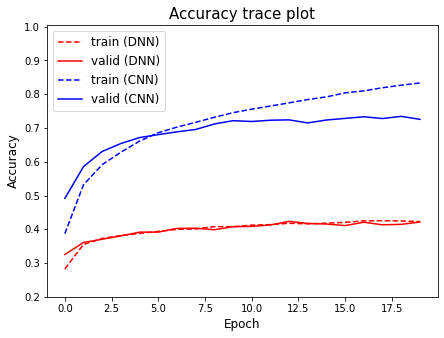

313/313 [==============================] - 1s 2ms/step - loss: 0.9128 - accuracy: 0.7143
Performance of DNN
...test accuracy: 0.424, test loss: 1.608
Performance of CNN
...test accuracy: 0.714, test loss: 0.913


In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.plot(dnn_hist.history['accuracy'], 'r--', label='train (DNN)')
plt.plot(dnn_hist.history['val_accuracy'], 'r-', label='valid (DNN)')
plt.plot(cnn_hist.history['accuracy'], 'b--', label='train (CNN)')
plt.plot(cnn_hist.history['val_accuracy'], 'b-', label='valid (CNN)')
plt.ylim([0.2,1.005])
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.title('Accuracy trace plot', fontsize=15)
plt.show()

dnn_sc = dnn_model.evaluate(test_x, test_y)
cnn_sc = cnn_model.evaluate(ext_test_x, test_y)
print('Performance of DNN')
print('...test accuracy: %.3f, test loss: %.3f'%(dnn_sc[1], dnn_sc[0]))
print('Performance of CNN')
print('...test accuracy: %.3f, test loss: %.3f'%(cnn_sc[1], cnn_sc[0]))
